# PUC MG - Pontifícia Universidade Católica de Minas Gerais

## TCC - Pós-Graduação em Ciência de Dados e Big Data

### Título: Avaliação da Efetividade da Fiscalização em Relação à Arrecadação

### Aluna: Selita Salvina de Medeiros

# Importando as Bibliotecas

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Carregando o Dataset

In [2]:
df_fiscPF = pd.read_csv("dataset2.csv",sep=';',index_col='Linha')
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,Idade Declarante,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda
Linha,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,39,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,71,Espólio,Não informado,2.0,2.0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,67,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,78,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,31,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0


In [3]:
# Verificando a dimensão do dataframe
df_fiscPF.shape

(3179, 15)

# Iniciando a Transformação dos Dados

In [4]:
# Verificando os tipos das variáveis
df_fiscPF.dtypes

Tributo                  object
PF1                      object
PF2                     float64
PF3                      object
PF4                      object
PF5                      object
Horas Trabalhadas       float64
Faixa Autuado             int64
Variacao Arrecadacao      int64
Ano Declaracao          float64
Idade Declarante          int64
Nat Ocup Principal       object
Ocup Principal           object
Faixa Patrimonio        float64
Faixa Renda             float64
dtype: object

## Verificando os Missing Values

In [5]:
df_fiscPF.isnull().sum()

Tributo                   0
PF1                       1
PF2                       1
PF3                       0
PF4                       0
PF5                       0
Horas Trabalhadas         1
Faixa Autuado             0
Variacao Arrecadacao      0
Ano Declaracao          111
Idade Declarante          0
Nat Ocup Principal      111
Ocup Principal          111
Faixa Patrimonio        111
Faixa Renda             111
dtype: int64

## Tratamento das variáveis Categóricas

In [6]:
#As variáveis Categóricas são:
# Tributo             transformada para baixa cardinalidade criar variáveis dummy
# PF1                 baixa cardinalidade                   criar variáveis LabelEncoder
# PF3                 baixa cardinalidade                   criar variáveis LabelEncoder
# PF4                 baixa cardinalidade                   criar variáveis LabelEncoder
# PF5                 baixa cardinalidade                   criar variáveis LabelEncoder
# Ano Declaracao      baixa cardinalidade                   criar variáveis LabelEncoder
# Nat Ocup Principal  alta cardinalidade                    criar variáveis Label Encoder
# Ocup Principal      alta cardinalidade                       

##  Tratamento conforme a cardinalidade

Abaixo, verificamos que as variáveis categóricas PF1, PF3, PF4, PF5 possuem menos de 10 valores únicos. Desta forma, são consideradas de baixa cardinalidade e o tratamento indicado é a criação de variáveis dummies.

Veremos que a variável Tributo também possui menos de 10 valores únicos. Mas, alguns valores possuem baixa frequência. Então, decidimos por agrupar os valores com baixa frequência.

Sobre a variável Ano Declaração, não nos é relevante o ano efetivo da declaração, mas sim, se é um contribuinte que entregou declaração de IR nos anos próximos. Então, será discretizada com base nesta característica.

### Transformando a variável Tributo
Agrupando tributos e criando variáveis dummy para cada valor

In [7]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['Tributo'].unique()

array(['Tributo-IRPF', 'Tributo-Outros', 'Tributo-IRRF',
       'Tributo-Previdência', 'Tributo-IPI', 'Tributo-IRPJ/CSLL',
       'Tributo-Simples', 'Tributo-IOF'], dtype=object)

In [8]:
# Verificando a quantidade de cada valor
df_fiscPF['Tributo'].value_counts()

Tributo-IRPF           2388
Tributo-Previdência     678
Tributo-Outros           42
Tributo-IRRF             33
Tributo-IRPJ/CSLL        27
Tributo-IPI               6
Tributo-IOF               4
Tributo-Simples           1
Name: Tributo, dtype: int64

In [9]:
#Vários tributos possuem baixa número de ocorrências. Então, decidimos por juntá-los como Outros
df_fiscPF['Tributo'] = df_fiscPF['Tributo'].replace({'Tributo-IRRF':'Tributo-Outros',
                                                     'Tributo-IRPJ/CSLL':'Tributo-Outros',
                                                     'Tributo-IPI':'Tributo-Outros',
                                                     'Tributo-IOF':'Tributo-Outros',
                                                     'Tributo-Simples':'Tributo-Outros'})
df_fiscPF['Tributo'].value_counts()

Tributo-IRPF           2388
Tributo-Previdência     678
Tributo-Outros          113
Name: Tributo, dtype: int64

In [10]:
#Criando as variáveis dummies para os Tributos
dummies = pd.get_dummies(df_fiscPF['Tributo'], drop_first = True, prefix = 'Dm')
df_fiscPF = pd.concat([df_fiscPF, dummies], axis = 1)
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,Idade Declarante,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência
Linha,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,39,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0,0,0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,71,Espólio,Não informado,2.0,2.0,0,0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,67,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0,1,0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,78,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0,0,0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,31,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0,0,0


### Transformando a variável PF1
Retirando valores nulos e criando variáveis Label Encoder

In [11]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['PF1'].unique()

array(['N', 'S', nan], dtype=object)

In [12]:
# Contando quantos valores nulos
df_fiscPF['PF1'].isna().sum()

1

In [13]:
# Verificando a quantidade de cada valor
df_fiscPF['PF1'].value_counts()

N    2900
S     278
Name: PF1, dtype: int64

In [14]:
# Vamos substituir o valor nulo pelo valor "N", já que corresponde a 91%
df_fiscPF['PF1'] = df_fiscPF['PF1'].fillna("N")
df_fiscPF['PF1'].value_counts()

N    2901
S     278
Name: PF1, dtype: int64

In [15]:
# Confirmando que não tem mais missing values
df_fiscPF['PF1'].isna().sum()

0

In [16]:
# Cria uma nova coluna [Le_PF1] com base na variável PF1 transformada em variável Label Encoder.
le = LabelEncoder()
df_fiscPF['Le_PF1'] = le.fit_transform(df_fiscPF['PF1'])
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,Idade Declarante,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência,Le_PF1
Linha,,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,39,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0,0,0,0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,71,Espólio,Não informado,2.0,2.0,0,0,0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,67,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0,1,0,0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,78,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0,0,0,0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,31,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0,0,0,0


### Transformando a variável PF3
Retirando valores nulos e criando variáveis Label Encoder

In [17]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['PF3'].unique()

array(['N', 'S'], dtype=object)

In [18]:
# Verificando a quantidade de cada valor
df_fiscPF['PF3'].value_counts()

N    2682
S     497
Name: PF3, dtype: int64

In [19]:
# Cria uma nova coluna [Le_PF3] com base na variável PF3 transformada em variável Label Encoder.
le = LabelEncoder()
df_fiscPF['Le_PF3'] = le.fit_transform(df_fiscPF['PF3'])
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,Idade Declarante,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência,Le_PF1,Le_PF3
Linha,,,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,39,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0,0,0,0,0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,71,Espólio,Não informado,2.0,2.0,0,0,0,0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,67,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0,1,0,0,0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,78,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0,0,0,0,0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,31,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0,0,0,0,1


### Transformando a variável PF4
Retirando valores nulos e criando variáveis Label Encoder

In [20]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['PF4'].unique()

array(['N', 'S'], dtype=object)

In [21]:
# Verificando a quantidade de cada valor
df_fiscPF['PF4'].value_counts()

N    2398
S     781
Name: PF4, dtype: int64

In [22]:
# Cria uma nova coluna [Le_PF4] com base na variável PF4 transformada em variável Label Encoder.
le = LabelEncoder()
df_fiscPF['Le_PF4'] = le.fit_transform(df_fiscPF['PF4'])
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,Idade Declarante,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência,Le_PF1,Le_PF3,Le_PF4
Linha,,,,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,39,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0,0,0,0,0,0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,71,Espólio,Não informado,2.0,2.0,0,0,0,0,0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,67,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0,1,0,0,0,0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,78,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0,0,0,0,0,0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,31,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0,0,0,0,1,0


### Transformando a variável PF5
Retirando valores nulos e criando variáveis Label Encoder

In [23]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['PF5'].unique()

array(['N', 'S'], dtype=object)

In [24]:
# Verificando a quantidade de cada valor
df_fiscPF['PF5'].value_counts()

N    2871
S     308
Name: PF5, dtype: int64

In [25]:
# Cria uma nova coluna [Le_PF5] com base na variável PF5 transformada em variável Label Encoder.
le = LabelEncoder()
df_fiscPF['Le_PF5'] = le.fit_transform(df_fiscPF['PF5'])
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,...,Nat Ocup Principal,Ocup Principal,Faixa Patrimonio,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência,Le_PF1,Le_PF3,Le_PF4,Le_PF5
Linha,,,,,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,...,Natureza da ocupação não especificada anterior...,Outras ocupações não especificadas anteriormente,4.0,1.0,0,0,0,0,0,0
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,...,Espólio,Não informado,2.0,2.0,0,0,0,0,0,0
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,...,Proprietário de empr. ou firma indiv. ou empre...,"Dirigente, pres., diretor emp. indust., com. o...",4.0,2.0,1,0,0,0,0,0
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,...,Servidor público de autarquia ou fundação esta...,Servidor das demais carreiras da admin. públic...,4.0,3.0,0,0,0,0,0,0
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,...,"Empregado de empresa setor privado, exceto ins...",Médico,2.0,2.0,0,0,0,1,0,0


### Transformando a variável Ano Declaração
Vamos criar uma variável Label Encoder, onde 1 representará os contribuintes que entregam declaração de renda e 0 os contribuintes que não entregam. Ou seja, os valores nulos serão transformados em valor 0.

In [26]:
# Checando os valores existentes e se tem valores nulos
df_fiscPF['Ano Declaracao'].unique()

array([2018., 2017., 2015.,   nan, 2016., 2013., 2014., 2019., 2020.])

In [27]:
# Contando quantos valores nulos
df_fiscPF['Ano Declaracao'].isna().sum()

111

In [28]:
#Vamos transformar todos os valores nulos em zero, onde representam que não foi entregue declaração de Imposto de Renda.
df_fiscPF['Ano Declaracao'] = df_fiscPF['Ano Declaracao'].fillna(0)
df_fiscPF['Ano Declaracao'].isna().sum()

0

In [29]:
#Vamos transformar todos os valores com anos preenchidos em 1, que representa que foi entregue
#declaração de renda
def Transforma(num):
    if num > 0:
       num = 1
    return num    
df_fiscPF['Declaracao'] = df_fiscPF['Ano Declaracao'].apply(lambda x: int(Transforma(x)))
df_fiscPF['Declaracao'].unique()

array([1, 0], dtype=int64)

In [30]:
df_fiscPF['Declaracao'].value_counts()

1    3068
0     111
Name: Declaracao, dtype: int64

### Transformando a variável Nat Ocup Principal
Retirando valores nulos e criando variáveis Label Encoder

In [31]:
# Contando quantos valores nulos
df_fiscPF['Nat Ocup Principal'].isna().sum()

111

In [32]:
# Para os missing values vamos criar a Natureza de Ocupação Principal "Natureza da Ocupacao nao declarada",
# pois estes valores faltantes correspondem aos contribuintes que não fazem a declaração de IR.
df_fiscPF['Nat Ocup Principal'] = df_fiscPF['Nat Ocup Principal'].fillna('Natureza da Ocupacao nao declarada')

In [33]:
# Verificando a quantidade de cada valor
df_fiscPF['Nat Ocup Principal'].value_counts()

Proprietário de empr. ou firma indiv. ou empregador-titular     1091
Profissional liberal ou autônomo sem vínculo de emprego          692
Empregado de empresa setor privado, exceto instit. financ.       297
Natureza da ocupação não especificada anteriormente              258
Aposentado, militar res. ou refor., pens. prev., exc. cd. 62     206
Natureza da Ocupacao nao declarada                               111
Membro ou servidor público da admin. direta estadual e do DF      89
Espólio                                                           63
Membro ou servidor público da administração direta federal        53
Membro ou servidor público da administração direta municipal      44
Servidor público de autarquia ou fundação federal                 38
Servidor público de autarquia ou fundação estadual e do DF        37
Capitalista que auferiu rendim. de capital, inclus. aluguéis      37
Empregado de instituições financeiras públicas e privadas         32
Aposentado, militar refor. ou pens

Como temos várias Naturezas de Ocupação Principal com baixa frequência, vamos agrupar estes valores.

In [34]:
# Vamos transformar todas as Naturezas de Ocupação Principal que envolvem servidores públicos em "Servidor Publico". 
# E, as Naturezas de Ocupação Principal que possuem menos de 60 valores serão transformadas em "Outras Naturezas"
df_fiscPF['Natureza agrupada'] = df_fiscPF['Nat Ocup Principal'].replace({
    'Membro ou servidor público da admin. direta estadual e do DF':'Servidor Publico',
    'Servidor público de autarquia ou fundação estadual e do DF':'Servidor Publico',
    'Membro ou servidor público da administração direta federal':'Servidor Publico',
    'Membro ou servidor público da administração direta municipal':'Servidor Publico',
    'Servidor público de autarquia ou fundação federal':'Servidor Publico',
    'Servidor público de autarquia ou fundação municipal':'Servidor Publico',
    'Capitalista que auferiu rendim. de capital, inclus. aluguéis':'Servidor Publico',
    'Empregado de instituições financeiras públicas e privadas':'Servidor Publico',
    'Aposentado, militar refor. ou pens. prev. com moléstia grave':'Outras Naturezas',
    'Beneficiário de pensão alimentícia':'Outras Naturezas',
    'Militar':'Outras Naturezas',
    'Empregado de empr. púb. ou soc. de economia mista municipal':'Outras Naturezas',
    'Empregado empr. púb. ou ec. mista est. e DF, exc. inst. fin.':'Outras Naturezas',
    'Empregado empr. púb. ou econ. mista fed., exc. inst. financ.':'Outras Naturezas',
    'Microempreendedor Individual - MEI':'Outras Naturezas',
    'Empregado ou contratado de organismo internacional ou de ONG':'Outras Naturezas',
    'Bolsista':'Outras Naturezas'})

In [35]:
# Verificando a quantidade de cada valor
df_fiscPF['Natureza agrupada'].value_counts()

Proprietário de empr. ou firma indiv. ou empregador-titular     1091
Profissional liberal ou autônomo sem vínculo de emprego          692
Servidor Publico                                                 347
Empregado de empresa setor privado, exceto instit. financ.       297
Natureza da ocupação não especificada anteriormente              258
Aposentado, militar res. ou refor., pens. prev., exc. cd. 62     206
Outras Naturezas                                                 114
Natureza da Ocupacao nao declarada                               111
Espólio                                                           63
Name: Natureza agrupada, dtype: int64

In [36]:
# Cria uma nova coluna [Le_Nat_Ocup_Principal] com base na variável Natureza Agrupagada transformada em variável Label Encoder.
le = LabelEncoder()
df_fiscPF['Le_Nat_Ocup_Principal'] = le.fit_transform(df_fiscPF['Natureza agrupada'])
df_fiscPF.head()

,Tributo,PF1,PF2,PF3,PF4,PF5,Horas Trabalhadas,Faixa Autuado,Variacao Arrecadacao,Ano Declaracao,...,Faixa Renda,Dm_Tributo-Outros,Dm_Tributo-Previdência,Le_PF1,Le_PF3,Le_PF4,Le_PF5,Declaracao,Natureza agrupada,Le_Nat_Ocup_Principal
Linha,,,,,,,,,,,,,,,,,,,,,
78,Tributo-IRPF,N,0.0,N,N,N,24.0,1,0,2018.0,...,1.0,0,0,0,0,0,0,1,Natureza da ocupação não especificada anterior...,4
192,Tributo-IRPF,N,0.0,N,N,N,8.0,1,0,2018.0,...,2.0,0,0,0,0,0,0,1,Espólio,2
671,Tributo-Outros,N,0.0,N,N,N,12.0,1,0,2018.0,...,2.0,1,0,0,0,0,0,1,Proprietário de empr. ou firma indiv. ou empre...,7
1859,Tributo-IRPF,N,0.0,N,N,N,16.0,1,0,2018.0,...,3.0,0,0,0,0,0,0,1,Servidor Publico,8
2727,Tributo-IRPF,N,0.0,S,N,N,0.0,1,0,2018.0,...,2.0,0,0,0,1,0,0,1,"Empregado de empresa setor privado, exceto ins...",1


In [37]:
# Identificando os labels das Naturezas agrupadas
df_fiscPF[['Natureza agrupada','Le_Nat_Ocup_Principal']].value_counts()

Natureza agrupada                                             Le_Nat_Ocup_Principal
Proprietário de empr. ou firma indiv. ou empregador-titular   7                        1091
Profissional liberal ou autônomo sem vínculo de emprego       6                         692
Servidor Publico                                              8                         347
Empregado de empresa setor privado, exceto instit. financ.    1                         297
Natureza da ocupação não especificada anteriormente           4                         258
Aposentado, militar res. ou refor., pens. prev., exc. cd. 62  0                         206
Outras Naturezas                                              5                         114
Natureza da Ocupacao nao declarada                            3                         111
Espólio                                                       2                          63
dtype: int64

### Transformando a variável Ocup Principal
Depois de analisar esta variável, decidimos por descartá-la.

In [38]:
# Verificando a quantidade de cada valor
df_fiscPF['Ocup Principal'].value_counts()

Dirigente, pres., diretor emp. indust., com. ou prest. serv.    641
Médico                                                          401
Não informado                                                   329
Outras ocupações não especificadas anteriormente                329
Produtor na exploração agropecuária                             276
                                                               ... 
Outros profissionais do espetáculo e das artes                    1
Presidente e diretor empresa pública e soc. economia mista        1
Trabalhador da indústria extrativa e da construção civil          1
Cinegrafista, fotógrafos e técnicos em máq. tratam. de dados      1
Inválido                                                          1
Name: Ocup Principal, Length: 88, dtype: int64

Como esta variável apresenta 89 valores diferentes e ela representa o detalhamento da variável Nat_Ocup_Principal, decidimos por não utilizar essa variável. Pois, entendemos que não teria valor explicativo relevante.

In [39]:
# Retirando esta coluna do dataset
df_fiscPF = df_fiscPF.drop(columns=['Ocup Principal'])
df_fiscPF.columns

Index(['Tributo', 'PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'Horas Trabalhadas',
       'Faixa Autuado', 'Variacao Arrecadacao', 'Ano Declaracao',
       'Idade Declarante', 'Nat Ocup Principal', 'Faixa Patrimonio',
       'Faixa Renda', 'Dm_Tributo-Outros', 'Dm_Tributo-Previdência', 'Le_PF1',
       'Le_PF3', 'Le_PF4', 'Le_PF5', 'Declaracao', 'Natureza agrupada',
       'Le_Nat_Ocup_Principal'],
      dtype='object')

## Tratamento das variáveis Quantitativas

In [40]:
#As variáveis Quantitativas são:
# PF2     
# Horas Trabalhadas
# Idade Declarante
# Faixa Autuado
# Variacao Arrecadacao
# Faixa Patrimonio
# Faixa Renda

### Verificação dos Missing Values

In [41]:
df_fiscPF[['PF2','Horas Trabalhadas','Faixa Autuado','Variacao Arrecadacao','Idade Declarante',
                              'Faixa Patrimonio','Faixa Renda']].isnull().sum()

PF2                       1
Horas Trabalhadas         1
Faixa Autuado             0
Variacao Arrecadacao      0
Idade Declarante          0
Faixa Patrimonio        111
Faixa Renda             111
dtype: int64

### Tratamento da variável PF2
Retirando o valor nulo e criando categorias conforme regras do negócio.

In [42]:
# Contando quantos valores nulos
df_fiscPF['PF2'].isna().sum()

1

In [43]:
# Verificando a distribuição da variável PF2
df_fiscPF['PF2'].describe()

count    3178.000000
mean        1.384833
std         8.237931
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       322.000000
Name: PF2, dtype: float64

In [44]:
# Como os quartis são todos iguais a zero, concluímos que existe uma grande frequência de valores zerados.
# Então, vamos preencher o valor nulo também com zero.
df_fiscPF['PF2'] = df_fiscPF['PF2'].fillna(0)
df_fiscPF['PF2'].isnull().sum()

0

As regras de negócio estabelecem as seguintes categorias:

0 - não ocorreu este procedimento fiscal

1 - 1 a 5 ocorrências

2 - 6 a 20 ocorrências

3 - 21 a 60 ocorrências

4 - acima de 60 ocorrências

In [45]:
# Vamos transformar a variável PF2 em categórica, criando a variável PF2_cat
def Transforma(num):
    if num > 60:
       num = 4
    elif num > 20:
       num = 3
    elif num > 5:
       num = 2
    elif num > 0:
       num = 1
    else:
       num = 0
    return num    
df_fiscPF['PF2_cat'] = df_fiscPF['PF2'].apply(lambda x: int(Transforma(x)))
df_fiscPF['PF2_cat'].unique()

array([0, 3, 1, 2, 4], dtype=int64)

### Tratamento da variável Horas Trabalhadas
Retirando os valores nulos e criando categorias conforme regras do negócio.

In [46]:
# Contando quantos valores nulos
df_fiscPF['Horas Trabalhadas'].isna().sum()

1

In [47]:
# Verificando a distribuição da variável Horas Trabalhadas
df_fiscPF['Horas Trabalhadas'].describe()

count    3178.000000
mean      111.955003
std       139.293304
min         0.000000
25%        19.000000
50%        72.000000
75%       154.750000
max      2676.000000
Name: Horas Trabalhadas, dtype: float64

<AxesSubplot:>

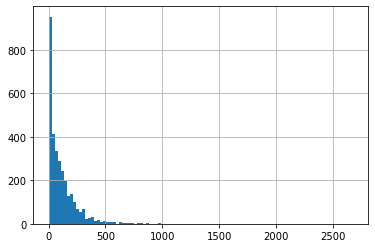

In [48]:
#Verificando o Tipo de distribuição dos dados
df_fiscPF['Horas Trabalhadas'].hist(bins=100)

In [49]:
#Verificando o valor da moda
df_fiscPF['Horas Trabalhadas'].mode()

0    0.0
dtype: float64

In [50]:
#Como essa variável é assimétrica à direita, parece mais adequado utilizar a mediana para preencher o  
#valor nulo
df_fiscPF['Horas Trabalhadas'] = df_fiscPF['Horas Trabalhadas'].fillna(df_fiscPF['Horas Trabalhadas'].median())
df_fiscPF['Horas Trabalhadas'].isna().sum()

0

As regras de negócio estabelecem as seguintes categorias:

0 - não ocorreu registro

1 - abaixo de 56 horas

2 - entre 56 e 84 horas

3 - acima de 84 horas

In [51]:
# Vamos transformar a variável Horas Trabalhadas em categórica, criando a variável HTrab_cat
def Transforma(num):
    if num > 84:
       num = 3
    elif num > 55:
       num = 2
    elif num > 0:
       num = 1
    else:
       num = 0
    return num    
df_fiscPF['HTrab_cat'] = df_fiscPF['Horas Trabalhadas'].apply(lambda x: int(Transforma(x)))
df_fiscPF['HTrab_cat'].unique()

array([1, 0, 3, 2], dtype=int64)

### Tratamento da variável Idade Declarante
Verificando se existem valores nulos e criando categorias por faixa de idade. Exemplo: faixa 1 => 10 a 19 anos

In [52]:
# Verificando a existência de valores nulos
df_fiscPF['Idade Declarante'].isna().sum()

0

In [53]:
# Vamos transformar a variável Idade Declarante em faixas, criando a variável Idade_cat
def Transforma(num):
    if num > 89:
       num = 9
    elif num > 79:
       num = 8
    elif num > 69:
       num = 7
    elif num > 59:
       num = 6
    elif num > 49:
       num = 5
    elif num > 39:
       num = 4
    elif num > 29:
       num = 3
    elif num > 19:
       num = 2
    else:
       num = 1
    return num    
df_fiscPF['Idade_cat'] = df_fiscPF['Idade Declarante'].apply(lambda x: int(Transforma(x)))
df_fiscPF['Idade_cat'].unique()

array([3, 7, 6, 5, 4, 2, 8, 9, 1], dtype=int64)

In [54]:
df_fiscPF['Idade Declarante'].describe()

count    3179.000000
mean       52.944637
std        14.785079
min        13.000000
25%        41.000000
50%        52.000000
75%        63.000000
max       108.000000
Name: Idade Declarante, dtype: float64

### Verificação de valores nulos nas variáveis de Faixas

In [55]:
#Verificando os missing values
df_fiscPF[['Faixa Autuado','Faixa Patrimonio','Faixa Renda']].isnull().sum()

Faixa Autuado         0
Faixa Patrimonio    111
Faixa Renda         111
dtype: int64

### Tratamento das variáveis Faixas: Patrimonio e Faixa Renda
Estas variáveis possuem missing values porque são de pessoas que não entregaram a declaração do Imposto de Renda. Neste caso, o tratamento para elas será deixar os valores como zerados.

In [56]:
#Preenchendo com zeros as variáveis de valores sem informação.
df_fiscPF[['Faixa Patrimonio','Faixa Renda']] = df_fiscPF[['Faixa Patrimonio','Faixa Renda']].fillna(0)

In [57]:
#Verificando os missing values
df_fiscPF[['Faixa Patrimonio','Faixa Renda']].isnull().sum()

Faixa Patrimonio    0
Faixa Renda         0
dtype: int64

In [58]:
# Transformando as variáveis Faixa Patrimonio e Faixa Renda no Tipo int
df_fiscPF['Faixa Patrimonio'] = df_fiscPF['Faixa Patrimonio'].apply(lambda x: int(x))
df_fiscPF['Faixa Renda'] = df_fiscPF['Faixa Renda'].apply(lambda x: int(x))
df_fiscPF.dtypes

Tributo                    object
PF1                        object
PF2                       float64
PF3                        object
PF4                        object
PF5                        object
Horas Trabalhadas         float64
Faixa Autuado               int64
Variacao Arrecadacao        int64
Ano Declaracao            float64
Idade Declarante            int64
Nat Ocup Principal         object
Faixa Patrimonio            int64
Faixa Renda                 int64
Dm_Tributo-Outros           uint8
Dm_Tributo-Previdência      uint8
Le_PF1                      int32
Le_PF3                      int32
Le_PF4                      int32
Le_PF5                      int32
Declaracao                  int64
Natureza agrupada          object
Le_Nat_Ocup_Principal       int32
PF2_cat                     int64
HTrab_cat                   int64
Idade_cat                   int64
dtype: object

## Excluindo as variáveis originais que foram transformadas

In [59]:
# Identificando todas as colunas do DataFrame
df_fiscPF.columns

Index(['Tributo', 'PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'Horas Trabalhadas',
       'Faixa Autuado', 'Variacao Arrecadacao', 'Ano Declaracao',
       'Idade Declarante', 'Nat Ocup Principal', 'Faixa Patrimonio',
       'Faixa Renda', 'Dm_Tributo-Outros', 'Dm_Tributo-Previdência', 'Le_PF1',
       'Le_PF3', 'Le_PF4', 'Le_PF5', 'Declaracao', 'Natureza agrupada',
       'Le_Nat_Ocup_Principal', 'PF2_cat', 'HTrab_cat', 'Idade_cat'],
      dtype='object')

In [60]:
df_finais = df_fiscPF.drop(columns=['Tributo', 'PF1', 'PF2', 'PF3', 'PF4', 'PF5','Horas Trabalhadas', 'Ano Declaracao',
                                    'Idade Declarante','Nat Ocup Principal','Natureza agrupada'])                                
df_finais.columns

Index(['Faixa Autuado', 'Variacao Arrecadacao', 'Faixa Patrimonio',
       'Faixa Renda', 'Dm_Tributo-Outros', 'Dm_Tributo-Previdência', 'Le_PF1',
       'Le_PF3', 'Le_PF4', 'Le_PF5', 'Declaracao', 'Le_Nat_Ocup_Principal',
       'PF2_cat', 'HTrab_cat', 'Idade_cat'],
      dtype='object')

# Análise Exploratória de Dados
Depois das transformações, todas as variáveis tornaram-se categóricas. Não temos mais variáveis quantitativas.

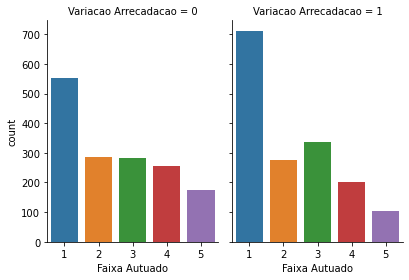

In [61]:
sns.catplot(x='Faixa Autuado', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

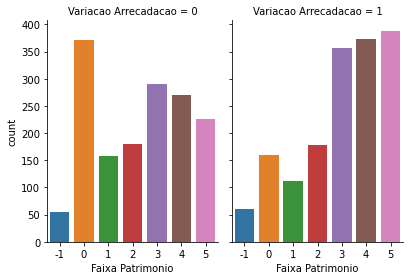

In [62]:
sns.catplot(x='Faixa Patrimonio', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

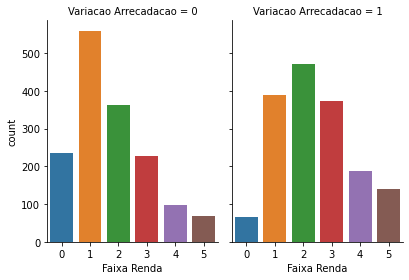

In [63]:
sns.catplot(x='Faixa Renda', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

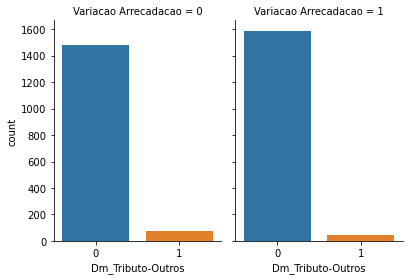

In [64]:
sns.catplot(x='Dm_Tributo-Outros', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

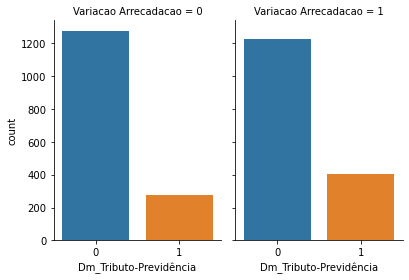

In [65]:
sns.catplot(x='Dm_Tributo-Previdência', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

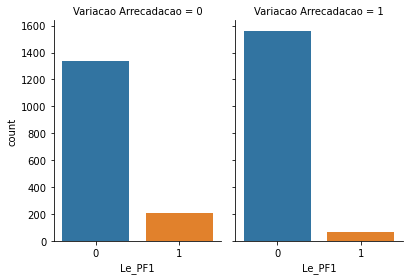

In [66]:
sns.catplot(x='Le_PF1', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

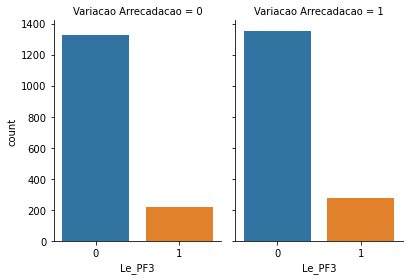

In [67]:
sns.catplot(x='Le_PF3', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

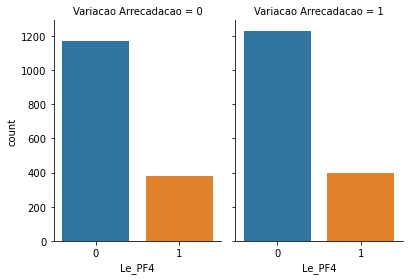

In [68]:
sns.catplot(x='Le_PF4', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

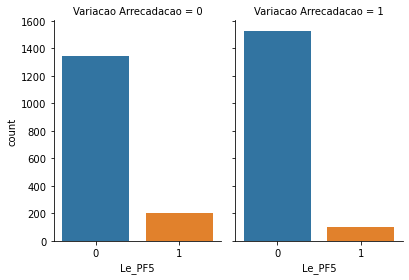

In [69]:
sns.catplot(x='Le_PF5', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

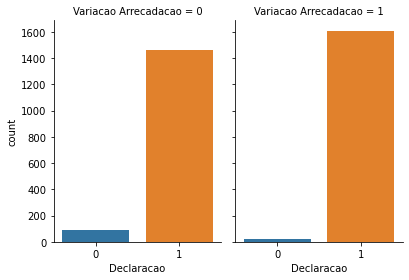

In [70]:
sns.catplot(x='Declaracao', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

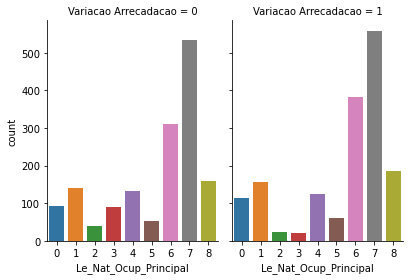

In [71]:
sns.catplot(x='Le_Nat_Ocup_Principal', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

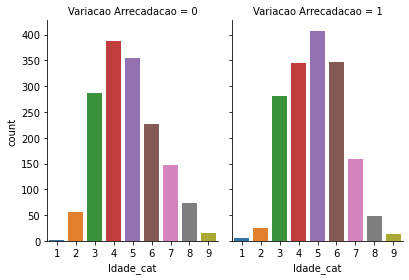

In [72]:
sns.catplot(x='Idade_cat', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

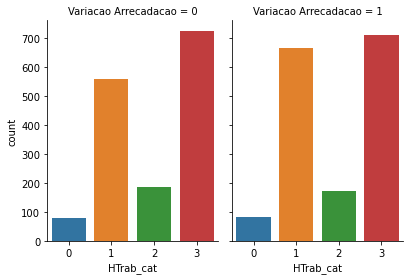

In [73]:
sns.catplot(x='HTrab_cat', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

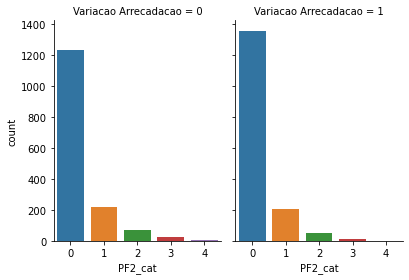

In [74]:
sns.catplot(x='PF2_cat', col='Variacao Arrecadacao',
                data=df_finais, kind="count",
                height=4, aspect=.7);

## Verificando se a Variável Target está balanceada
A variável target é a Variacao Arrecadacao

In [75]:
# Analisando o percentual de distribuição da variável target
df_finais['Variacao Arrecadacao'].value_counts()/df_finais.shape[0]

1    0.512425
0    0.487575
Name: Variacao Arrecadacao, dtype: float64

<AxesSubplot:xlabel='Variacao Arrecadacao', ylabel='count'>

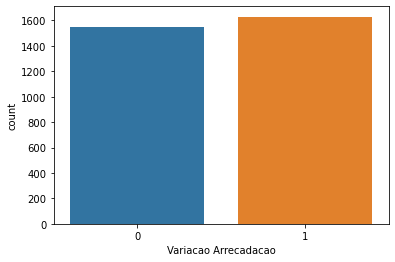

In [76]:
#Gráfico da variável target
sns.countplot(x = 'Variacao Arrecadacao', data = df_finais)

# Separação das variáveis Explicativas e Resultado
Vamos selecionar as variáveis transformadas

In [77]:
df_explicativas = df_finais.drop(columns=['Variacao Arrecadacao'])                                
df_explicativas.dtypes

Faixa Autuado             int64
Faixa Patrimonio          int64
Faixa Renda               int64
Dm_Tributo-Outros         uint8
Dm_Tributo-Previdência    uint8
Le_PF1                    int32
Le_PF3                    int32
Le_PF4                    int32
Le_PF5                    int32
Declaracao                int64
Le_Nat_Ocup_Principal     int32
PF2_cat                   int64
HTrab_cat                 int64
Idade_cat                 int64
dtype: object

In [78]:
# Separando a variável resultado categórica
df_target = df_fiscPF['Variacao Arrecadacao']
df_target.head()

Linha
78      0
192     0
671     0
1859    0
2727    0
Name: Variacao Arrecadacao, dtype: int64

# Selecionando as variáveis mais importantes

## Utilizando a Regressão Logística com Statsmodels
As variáveis selecionadas foram: Faixa Autuado, Faixa Patrimonio, Faixa Renda, Le_PF1 e Dm_Tributos-Previdência.

In [79]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(df_explicativas, df_target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\85817570734\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(df_target,df_explicativas)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.638914
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     Variacao Arrecadacao   No. Observations:                 3179
Model:                            Logit   Df Residuals:                     3165
Method:                             MLE   Df Model:                           13
Date:                  Wed, 07 Jul 2021   Pseudo R-squ.:                 0.07783
Time:                          15:19:29   Log-Likelihood:                -2031.1
converged:                         True   LL-Null:                       -2202.5
Covariance Type:              nonrobust   LLR p-value:                 2.474e-65
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Faixa Autuado             -0.2137      0.042     -5.106      0.000  

In [81]:
LRS = np.array([True,True,True,False,True,True,False,False,False,False,False,False,False,False])
LRS

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False])

## Utilizando o Método RandomForestClassifier

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
emb_selector = SelectFromModel(RandomForestClassifier(random_state=42))
emb_selector.fit(df_explicativas,df_target)
emb_support = emb_selector.get_support()
emb_feature = df_explicativas.loc[:,emb_support].columns.tolist()

print(str(len(emb_feature)), ' Foram as variaveis selecionadas:')
print(emb_feature)

5  Foram as variaveis selecionadas:
['Faixa Autuado', 'Faixa Patrimonio', 'Faixa Renda', 'Le_Nat_Ocup_Principal', 'Idade_cat']


## Utilizando o Método XGBoost (Extreme Gradient Boosting)

In [83]:
!pip install xgboost

In [84]:
from xgboost import XGBClassifier

In [85]:
# Particionando a base de dados em treinamento (80%) e teste (20%) 
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_explicativas, df_target,
                                                                  test_size = 0.2,
                                                                  random_state = 20111974)

In [86]:
X_treinamento.shape

(2543, 14)

In [87]:
X_teste.shape

(636, 14)

In [88]:
from sklearn.metrics import accuracy_score
# Cria um clasificador XGBoost
clf = XGBClassifier(n_estimators = 10000, random_state = 20111974, n_jobs = 50, max_depth = 3, 
                    learning_rate = 0.61, eval_metric='logloss',use_label_encoder=False)

# Treina o classificador
clf.fit(X_treinamento, y_treinamento)

# Calcula o y_pred e avalia a qualidade do ajuste
y_pred = clf.predict(X_teste)
predicao = [round(value) for value in y_pred]
acuracia = accuracy_score(y_teste, predicao)
print(f"Acurácia: {acuracia}")

Acurácia: 0.6084905660377359


In [89]:
# Ajusta o algoritmo usando cada importância calculada como threshold
from sklearn.feature_selection import SelectFromModel

thresholds = sorted(clf.feature_importances_)
for thresh in thresholds:
	# seleciona as features usando threshold
	selection = SelectFromModel(clf, threshold=thresh, prefit=True)
	select_X_treinamento = selection.transform(X_treinamento)
	
    # treina o ML
	selection_clf = XGBClassifier()
	selection_clf.fit(select_X_treinamento, y_treinamento)
	
    # Avalia o ML
	select_X_teste = selection.transform(X_teste)
	y_pred = selection_clf.predict(select_X_teste)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_teste, predictions)
	print(f"Threshold= {round(thresh,2)}, n= {select_X_treinamento.shape[1]}, Acurácia: {round(accuracy*100.0,2)}")

C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.029999999329447746, n= 14, Acurácia: 61.48


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.03999999910593033, n= 13, Acurácia: 62.26


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.05999999865889549, n= 12, Acurácia: 60.53


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.05999999865889549, n= 11, Acurácia: 63.68


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07000000029802322, n= 10, Acurácia: 63.21


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07000000029802322, n= 9, Acurácia: 62.26


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07000000029802322, n= 8, Acurácia: 63.21


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07999999821186066, n= 7, Acurácia: 63.68


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07999999821186066, n= 6, Acurácia: 62.89


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07999999821186066, n= 5, Acurácia: 61.95


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07999999821186066, n= 4, Acurácia: 63.52


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.07999999821186066, n= 3, Acurácia: 63.99


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.09000000357627869, n= 2, Acurácia: 63.36


C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold= 0.10000000149011612, n= 1, Acurácia: 63.21


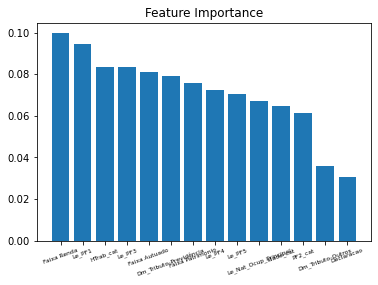

In [90]:
# Calcula a importância das features
importances = clf.feature_importances_

# Ordena as importâncias por ordem descendente
indices = np.argsort(importances)[::-1]

# Organiza...
names = [X_treinamento.columns[i] for i in indices]

# Barplot
plt.bar(range(X_treinamento.shape[1]), importances[indices])

# Coloca o nome dos labels no eixo X
plt.xticks(range(X_treinamento.shape[1]), names, rotation=20, fontsize = 6)

# Constroi o gráfico
plt.title("Feature Importance")

# Mostra o gráfico
plt.show()

In [91]:
names

['Faixa Renda',
 'Le_PF1',
 'HTrab_cat',
 'Le_PF3',
 'Faixa Autuado',
 'Dm_Tributo-Previdência',
 'Faixa Patrimonio',
 'Le_PF4',
 'Le_PF5',
 'Le_Nat_Ocup_Principal',
 'Idade_cat',
 'PF2_cat',
 'Dm_Tributo-Outros',
 'Declaracao']

In [92]:
XGB = np.array([True,True,True,False,True,True,True,False,False,False,False,False,True,False])
XGB

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False])

## Seleção eleita

In [93]:
df_explicativas.columns

Index(['Faixa Autuado', 'Faixa Patrimonio', 'Faixa Renda', 'Dm_Tributo-Outros',
       'Dm_Tributo-Previdência', 'Le_PF1', 'Le_PF3', 'Le_PF4', 'Le_PF5',
       'Declaracao', 'Le_Nat_Ocup_Principal', 'PF2_cat', 'HTrab_cat',
       'Idade_cat'],
      dtype='object')

In [94]:
feature_selection_df = pd.DataFrame({'Variáveis': df_explicativas.columns, #  cria coluna "Variaveis' com conteúdo igual nome das colunas
                                    'LRS': LRS, 
                                    'RFC': emb_support,
                                    'XGBoost':XGB})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1) # cria coluna 'Total' com somatório dos valores True.
                                                            # axis = 1 significa que está somando valores das colunas.
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],
                                                       ascending=False)
feature_selection_df

,Variáveis,LRS,RFC,XGBoost,Total
2,Faixa Renda,True,True,True,3
1,Faixa Patrimonio,True,True,True,3
0,Faixa Autuado,True,True,True,3
5,Le_PF1,True,False,True,2
4,Dm_Tributo-Previdência,True,False,True,2
6,Le_PF3,False,False,True,1
10,Le_Nat_Ocup_Principal,False,True,False,1
13,Idade_cat,False,True,False,1
12,HTrab_cat,False,False,True,1
11,PF2_cat,False,False,False,0


### Criando o DataFrame com as variáveis selecionadas

In [95]:
df_selec = df_explicativas[['Faixa Renda','Faixa Patrimonio','Faixa Autuado','Le_PF1']]
df_selec.head()

,Faixa Renda,Faixa Patrimonio,Faixa Autuado,Le_PF1
Linha,,,,
78,1,4,1,0
192,2,2,1,0
671,2,4,1,0
1859,3,4,1,0
2727,2,2,1,0


### Separando os dados para Treino e Teste

In [96]:
# Separamos os dados em 80% para Treino e 20% para Teste
from sklearn.model_selection import train_test_split 
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_selec,df_target,test_size=0.2,random_state=196)      

# Criação dos Modelos de Machine Learning

In [97]:
# Importando as bibliotecas
from sklearn.model_selection import GridSearchCV # para otimizar os hiperparâmetros dos modelos preditivos
from sklearn.model_selection import cross_val_score # Para o CV (Cross-Validation)
from sklearn.model_selection import cross_validate

## Modelo XGBoost (Extreme Gradient Boosting)

In [98]:
# Importando as Bibliotecas
from xgboost import XGBClassifier
import xgboost as xgb

In [99]:
# Instancia...
ml_XGB = XGBClassifier(scale_pos_weight=1,
                       learning_rate=0.01,  
                       colsample_bytree = 1,
                       subsample = 0.8,
                       objective='binary:logistic',
                       eval_metric='logloss',
                       n_estimators=1000, 
                       reg_alpha = 0.3,
                       max_depth= 3, 
                       gamma=1, 
                       max_delta_step=5)
ml_XGB.fit(X_treinamento, y_treinamento)

C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=5,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0.3, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [100]:
# Cross-Validation com 10 folds
a_scores_CV = cross_val_score(ml_XGB, X_treinamento, y_treinamento, cv = 10)
print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
print(f'Acurácias: {a_scores_CV}')

C:\Users\85817570734\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Média das Acurácias calculadas pelo CV....: 65.36
std médio das Acurácias calculadas pelo CV: 2.74
Acurácias: [0.63529412 0.69019608 0.63921569 0.6496063  0.70866142 0.67322835
 0.63385827 0.65354331 0.63779528 0.61417323]


## Medindo a acurária com os dados de teste

In [101]:
# Rodando o algoritmo XGBoost com a base de Teste
y_pred_XGB = ml_XGB.predict(X_teste)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred_XGB, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste, y_pred_XGB) )

              precision    recall  f1-score   support

           0       0.71      0.50      0.58       318
           1       0.61      0.79      0.69       318

    accuracy                           0.64       636
   macro avg       0.66      0.64      0.64       636
weighted avg       0.66      0.64      0.64       636

Acurácia de Previsão: 0.6446540880503144


# Matriz de Confusão

In [103]:
# Importando a biblioteca
from sklearn.metrics import confusion_matrix

In [104]:
def mostra_confusion_matrix(cf,                   # dados da matriz de confusão
                            group_names = None,   # lista das labels mostradas em cada quadrado
                            categories = 'auto',  # lista das categorias mostradas nos eixos x e y
                            count = True,         # se True, mostra as quantidades em cada quadrado
                            percent = True,       # se True, mostra os percentuais em cada quadrado
                            cbar = True,          # se True, mostra uma barra de cores. Os valores da barra são baseados nos dados
                            xyticks = False,      # se True, mostra a marcação de x e y
                            xyplotlabels = False, # se True, mostra 'True Label' e 'Predicted Label'
                            figsize = (4, 4),     
                            cmap = 'Blues'):
    
    # Gera o texto dentro de cada quadrado
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # Plota o mapa de calor
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
   

### Gerando a Matriz de Confusão para o algoritmo XGBoost


********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********


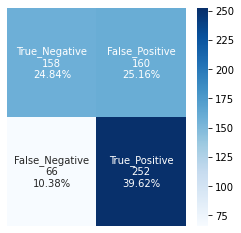

In [105]:
# Matriz de Confusão
print(f'\n********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********')
cf_matrix = confusion_matrix(y_teste, y_pred_XGB)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

# Modelo Logistic Regression

In [106]:
# Importando a biblioteca
from sklearn.linear_model import LogisticRegression

In [107]:
# Criando dicionário com os hiperparâmetros
LR_dict= {"C":np.logspace(-3,3,7),
          "penalty":["l2"],
          'random_state': [1967]}

In [108]:
# Treinando com a Regressão Logística
LR = LogisticRegression(random_state=1967)
LR_grid = GridSearchCV(estimator=LR,       # modelo logistic Regression
                      param_grid=LR_dict,  # dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia                    
                      cv=10)               # cross-validation = 10 folds
LR_grid.fit(X_treinamento, y_treinamento)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1967),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'], 'random_state': [1967]},
             scoring='accuracy')

In [109]:
LR_grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 1967}

In [110]:
# Acurácia de treinamento
LR_grid.best_score_

0.6366435077968194

## Medindo a acurária com os dados de teste

In [111]:
# Rodando o algoritmo Logistic Regression com a base de Teste
y_pred_LR = LR_grid.predict(X_teste)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred_LR, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste, y_pred_LR) )

              precision    recall  f1-score   support

           0       0.67      0.52      0.58       318
           1       0.61      0.74      0.67       318

    accuracy                           0.63       636
   macro avg       0.64      0.63      0.63       636
weighted avg       0.64      0.63      0.63       636

Acurácia de Previsão: 0.6305031446540881


### Matriz de Confusão para o algoritmo Logistic Regression


********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********


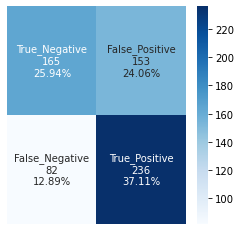

In [113]:
# Matriz de Confusão
print(f'\n********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********')
cf_matrix = confusion_matrix(y_teste, y_pred_LR)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

# Modelo Random Forest

In [114]:
# Importando a biblioteca
from sklearn.ensemble import RandomForestClassifier

In [115]:
# Criando dicionário com os hiperparâmetros
RF_dict = {'n_estimators':[50,100,200,300,800,1000],   # numero de estimadores que será testado.
           'criterion':['gini', 'entropy'],            # critérios
           'bootstrap':[False, True],                  # amostragem com e sem reposição.
           'random_state': [196]}
RF_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [196]}

In [116]:
RF = RandomForestClassifier(random_state=42)
RF_grid = GridSearchCV(estimator=RF,       # modelo Random Forest
                      param_grid=RF_dict,  # dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)               # cross-validation = 10 folds
RF_grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [117]:
RF_grid.fit(X_treinamento, y_treinamento)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [118]:
RF_grid.best_score_

0.6366388760228501

### Medindo a acurária com os dados de teste

In [119]:
# Rodando o algoritmo Random Forest
y_pred_RF = RF_grid.predict(X_teste)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred_RF, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste, y_pred_RF) )

              precision    recall  f1-score   support

           0       0.68      0.52      0.59       318
           1       0.61      0.76      0.68       318

    accuracy                           0.64       636
   macro avg       0.65      0.64      0.63       636
weighted avg       0.65      0.64      0.63       636

Acurácia de Previsão: 0.6367924528301887


### Matriz de Confusão para o algoritmo Random Forest


********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********


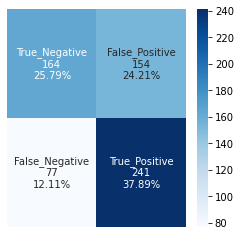

In [122]:
# Matriz de Confusão
print(f'\n********* MATRIZ DE CONFUSÃO - TUNNING DE PARÂMETROS ***********')
cf_matrix = confusion_matrix(y_teste, y_pred_RF)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)